In [ ]:

import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
df=pd.read_csv("/content/kc_house_data.csv")

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df['date'] = pd.to_datetime(df['date'])

<Axes: title={'center': 'Pearson Correlation Matrix'}>

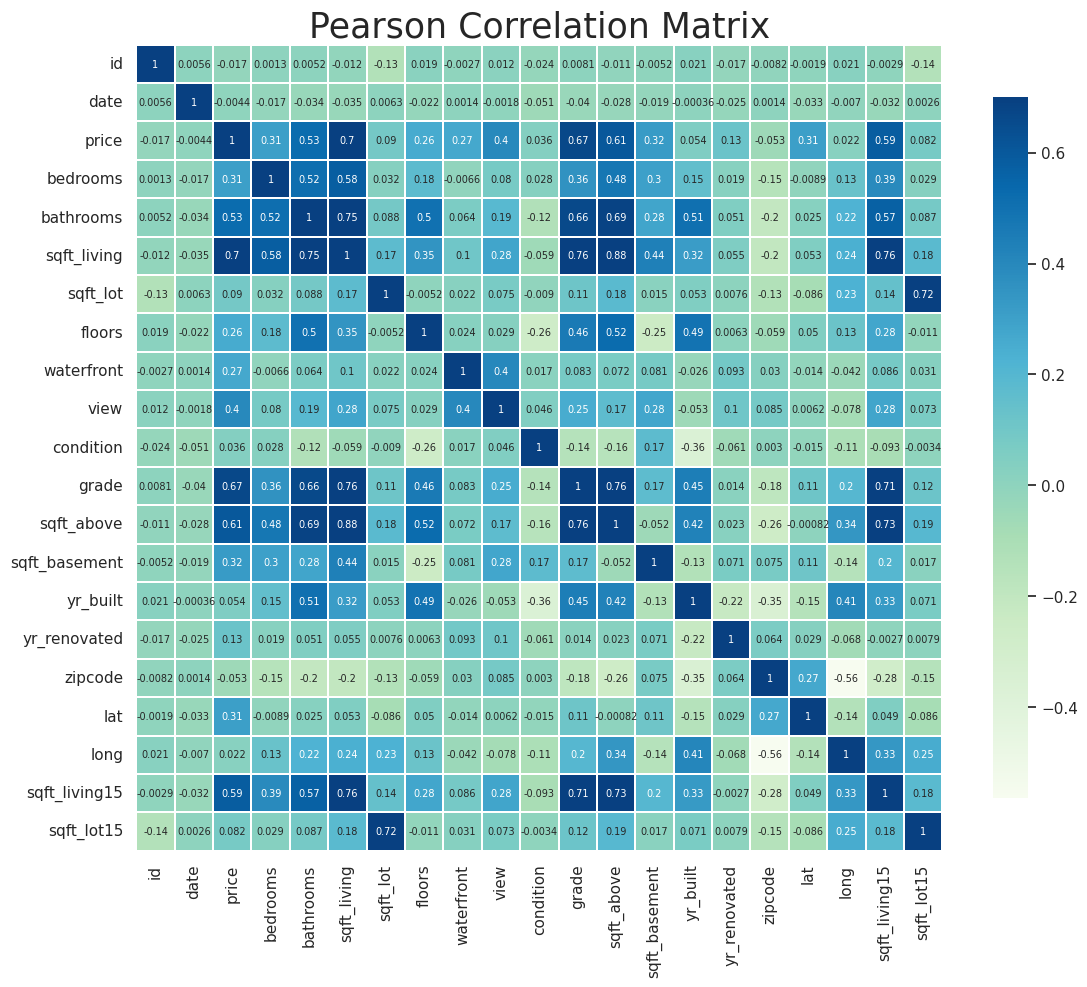

In [ ]:
sns.set(style="whitegrid", font_scale=1)

plt.figure(figsize=(13,13))
plt.title('Pearson Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=True, annot_kws={"size":7}, cbar_kws={"shrink": .7})

In [ ]:
price_corr = df.corr()['price'].sort_values(ascending=False)
print(price_corr)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
date            -0.004357
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64


<ipython-input-16-8992c7a9a438>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'], ax=axes[0])


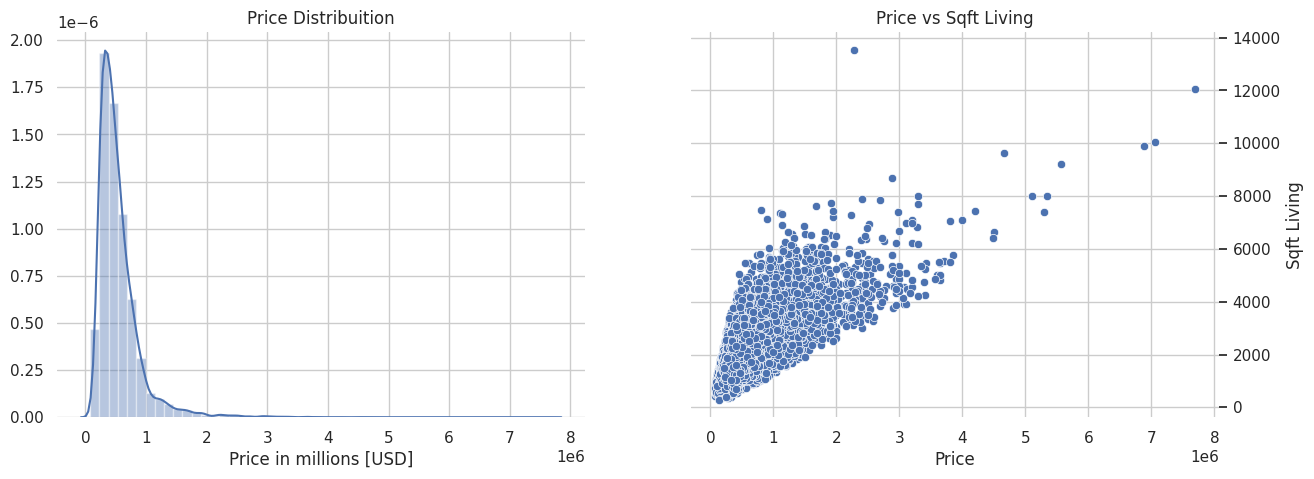

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.distplot(df['price'], ax=axes[0])
sns.scatterplot(x='price',y='sqft_living', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[0].set(xlabel='Price in millions [USD]', ylabel='', title='Price Distribuition')
axes[1].set(xlabel='Price', ylabel='Sqft Living', title='Price vs Sqft Living')
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()

[Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Grade vs Price Box Plot')]

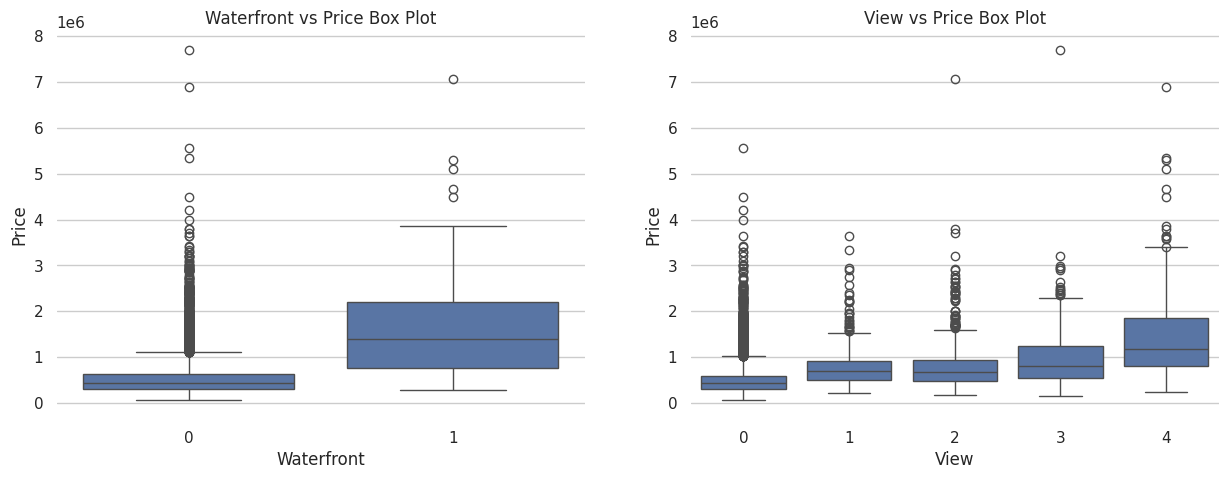

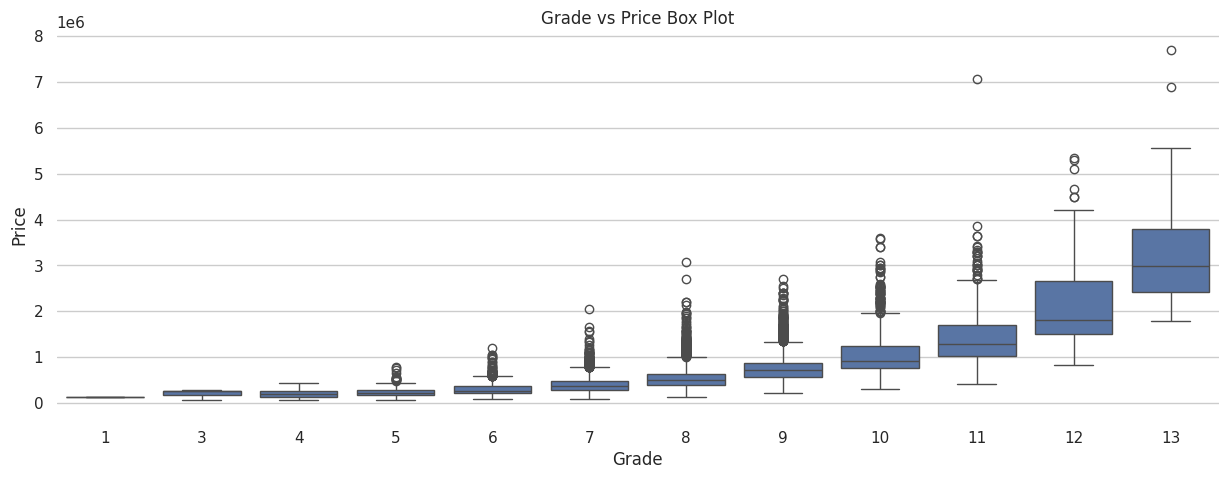

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=df['waterfront'],y=df['price'], ax=axes[0])
sns.boxplot(x=df['view'],y=df['price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Waterfront', ylabel='Price', title='Waterfront vs Price Box Plot')
axes[1].set(xlabel='View', ylabel='Price', title='View vs Price Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
sns.boxplot(x=df['grade'],y=df['price'], ax=axe)
sns.despine(left=True, bottom=True)
axe.set(xlabel='Grade', ylabel='Price', title='Grade vs Price Box Plot')

In [ ]:
df = df.drop('id', axis=1)
df = df.drop('zipcode',axis=1)



In [ ]:
df['date'] = pd.to_datetime(df['date'])



df['month'] = df['date'].apply(lambda date:date.month)
df['year'] = df['date'].apply(lambda date:date.year)

df = df.drop('date',axis=1)

# Check the new columns
print(df.columns.values)

['price' 'bedrooms' 'bathrooms' 'sqft_living' 'sqft_lot' 'floors'
 'waterfront' 'view' 'condition' 'grade' 'sqft_above' 'sqft_basement'
 'yr_built' 'yr_renovated' 'lat' 'long' 'sqft_living15' 'sqft_lot15'
 'month' 'year']


[Text(0.5, 0, 'Month'), Text(0, 0.5, 'Price'), Text(0.5, 1.0, 'Price Trends')]

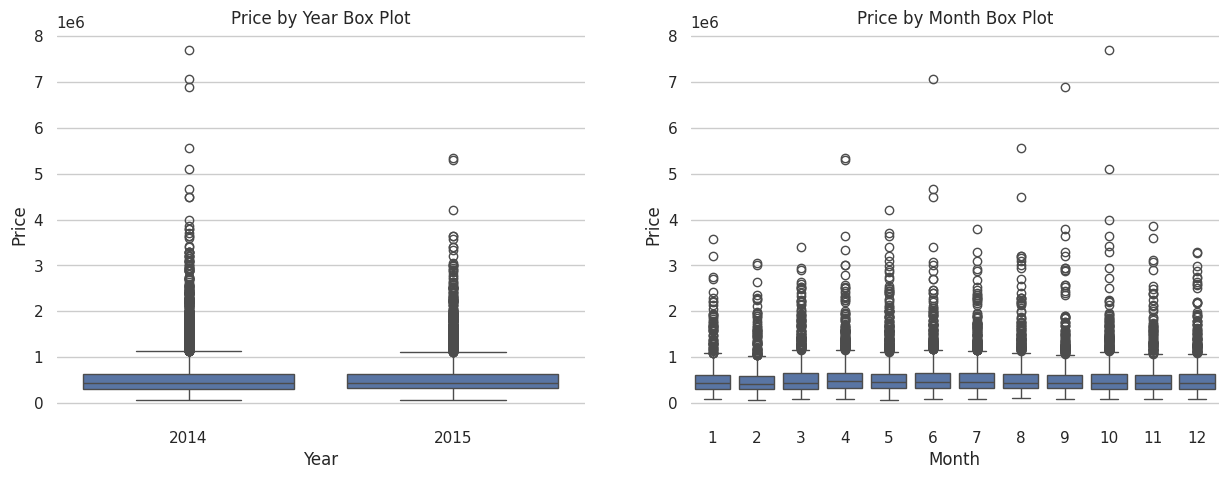

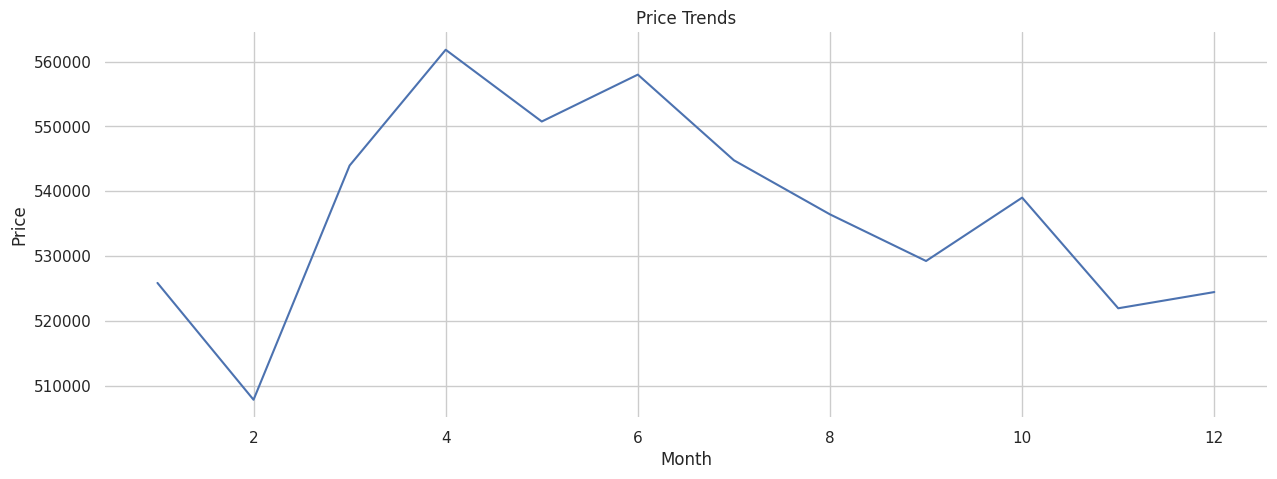

In [ ]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x='year',y='price',data=df, ax=axes[0])
sns.boxplot(x='month',y='price',data=df, ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Year', ylabel='Price', title='Price by Year Box Plot')
axes[1].set(xlabel='Month', ylabel='Price', title='Price by Month Box Plot')

f, axe = plt.subplots(1, 1,figsize=(15,5))
df.groupby('month').mean()['price'].plot()
sns.despine(left=True, bottom=True)
axe.set(xlabel='Month', ylabel='Price', title='Price Trends')

In [ ]:
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()


In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
model.intercept_


75000.00000000035

In [ ]:
model.coef_

array([ 7.62500000e+06, -4.88533528e-10,  1.99260941e-09, -3.35965634e-09,
        6.23680642e-10, -6.55174287e-11,  9.36694230e-10,  4.31496799e-10,
        9.09815226e-10,  1.17340853e-10, -1.57307189e-10,  1.56340489e-09,
       -1.58152663e-10,  4.86556105e-11, -8.08590234e-10,  2.02465189e-09,
        1.24513590e-09, -9.29602629e-10,  5.53054815e-10])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([[516941.6 ],
       [647847.8 ],
       [499126.3 ],
       ...,
       [411721.16],
       [213799.22],
       [981941.9 ]], dtype=float32)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mean_absolute_error(y_test,y_pred)

104248.6826334535

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.1992143455172358

In [ ]:
mean_squared_error(y_test,y_pred)

28161836178.926193

In [ ]:
print(y_pred[0:5])

print(y_test[0:5])

[[516941.6 ]
 [647847.8 ]
 [499126.3 ]
 [339539.56]
 [195265.67]]
3834     349950.0
1348     450000.0
20366    635000.0
16617    355500.0
20925    246950.0
Name: price, dtype: float64


In [ ]:
X = df.drop('price',axis=1)
X = df.drop('month',axis=1)
X = df.drop('year',axis=1)
X = df.drop('long',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [ ]:
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(y_pred[0:5])

print(y_test[0:5])

In [ ]:
model = Sequential()

# input layer
model.add(Dense(19,activation='relu'))

# hidden layers
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))
model.add(Dense(19,activation='relu'))

# output layer
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [ ]:
model.fit(x=X_train,y=y_train.values,
          batch_size=128,epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 2ms/step - loss: 423626735616.0000
Epoch 2/400
119/119 [==============================] - 0s 2ms/step - loss: 422690291712.0000
Epoch 3/400
119/119 [==============================] - 0s 2ms/step - loss: 409038815232.0000
Epoch 4/400
119/119 [==============================] - 0s 2ms/step - loss: 336720855040.0000
Epoch 5/400
119/119 [==============================] - 0s 2ms/step - loss: 184900894720.0000
Epoch 6/400
119/119 [==============================] - 0s 2ms/step - loss: 100385906688.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 93603012608.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 91912216576.0000
Epoch 9/400
119/119 [==============================] - 0s 3ms/step - loss: 90233585664.0000
Epoch 10/400
119/119 [==============================] - 0s 3ms/step - loss: 88507580416.0000
Epoch 11/400
119/119 [==============================] - 0s 4ms/step - los

In [ ]:
y_pred=model.predict(X_test)

203/203 [==============================] - 0s 1ms/step


In [ ]:
print(y_pred[0:50])

print(y_test[0:50])

[[ 349950.16]
 [ 450009.1 ]
 [ 635009.1 ]
 [ 355506.4 ]
 [ 246959.1 ]
 [ 406563.78]
 [ 350004.4 ]
 [ 226517.75]
 [ 265010.62]
 [ 655999.25]
 [ 580010.2 ]
 [ 885012.5 ]
 [ 270015.12]
 [ 509009.16]
 [ 650018.  ]
 [ 272013.47]
 [ 720009.1 ]
 [ 335012.9 ]
 [ 492524.6 ]
 [ 722517.3 ]
 [ 209953.39]
 [ 255012.88]
 [ 647507.  ]
 [ 650020.2 ]
 [ 308006.7 ]
 [ 720517.75]
 [ 635001.6 ]
 [ 455021.25]
 [ 530020.06]
 [ 199992.69]
 [ 299003.47]
 [ 370018.38]
 [ 190009.22]
 [ 655000.25]
 [ 265014.53]
 [ 725012.5 ]
 [1050017.4 ]
 [ 268002.44]
 [ 314993.66]
 [ 304512.16]
 [1199014.4 ]
 [ 593017.5 ]
 [ 762511.56]
 [ 291849.47]
 [ 245012.3 ]
 [1000013.5 ]
 [1010013.8 ]
 [ 893893.06]
 [ 412018.75]
 [ 269001.88]]
3834      349950.0
1348      450000.0
20366     635000.0
16617     355500.0
20925     246950.0
7891      406550.0
939       350000.0
10502     226500.0
2948      265000.0
5079      656000.0
10124     580000.0
5624      885000.0
7567      270000.0
19375     509000.0
4681      650000.0
8745      2720

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

7.570168935938335e-05

In [ ]:
mean_squared_error(y_test,y_pred)

50043.881123452775